# Similarity Score
Code for creating similarity score

In [374]:
import pandas as pd
import numpy as np

Open and View File

In [375]:
data_epithelial = pd.read_csv('data/gene_filtered_matrices_no_batch/bioinf590_project_epithelial_filt.csv')
data_epithelial

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2115) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,TFF1,LCN2,IFI27,CLDN18,S100P,C19orf33,TM4SF1,SPINK1,KRT19,...,AKAP13,CRBN,IER2,SMCHD1,SERPINA1,MACF1,SYNGR2,Simple_Relabelling,Patient_ID,State
0,1,4.281767,1.559453,2.141529,2.713756,3.465387,3.745223,2.024640,1.057134,2.141529,...,0.662201,0.000000,1.339508,0.000000,0.000000,0.000000,1.559453,Epithelial,181429,PDA
1,2,3.529345,3.037880,2.656100,2.656100,2.865100,3.706767,3.924987,2.391556,2.656100,...,0.000000,0.000000,0.000000,0.000000,2.030819,0.000000,1.460976,Epithelial,181429,PDA
2,3,0.600955,2.308811,2.223389,0.000000,2.026946,2.906958,1.244609,0.000000,1.244609,...,0.000000,0.000000,0.600955,0.973698,1.633017,0.000000,0.973698,Epithelial,181429,PDA
3,4,2.942443,1.450639,2.520148,2.019118,3.172240,3.844210,2.019118,0.000000,2.379316,...,0.968093,0.000000,0.000000,0.000000,0.968093,0.000000,2.019118,Epithelial,181429,PDA
4,5,0.000000,2.260612,2.488479,0.800653,2.673937,3.331985,2.585501,0.000000,2.900207,...,0.000000,0.000000,0.000000,0.000000,1.543508,0.000000,1.239529,Epithelial,181429,PDA
5,6,4.954022,3.752997,2.524872,1.908750,4.531679,3.964651,2.821247,2.821247,2.731873,...,0.000000,0.890424,0.000000,0.000000,1.669307,1.353855,0.000000,Epithelial,181429,PDA
6,7,2.595543,1.785330,0.000000,0.000000,3.037171,4.219227,0.000000,0.000000,2.595543,...,0.000000,0.000000,0.000000,1.247255,0.000000,0.000000,1.785330,Epithelial,181429,PDA
7,8,3.983388,2.913685,1.808268,0.993236,3.193534,3.354256,1.938720,1.938720,2.621016,...,1.573791,0.354164,0.821966,0.000000,0.000000,0.821966,1.380006,Epithelial,181429,PDA
8,9,1.807345,3.209760,2.053139,0.000000,2.790105,3.646958,0.000000,0.000000,2.889305,...,0.000000,0.000000,0.000000,0.992541,0.000000,0.000000,0.992541,Epithelial,181429,PDA
9,10,4.035906,0.000000,0.000000,0.000000,0.000000,3.360274,2.073080,2.073080,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.701263,Epithelial,181429,PDA


In [376]:
data_epithelial[data_epithelial['Patient_ID'] == '181429'].shape

(84, 2117)

Size of file

In [377]:
data_epithelial.shape

(3165, 2117)

In [378]:
data_epithelial['State'].unique()

array(['PDA', 'DuoAd'], dtype=object)

Types of Cells and Patients

In [379]:
cell_type_col = 'Simple_Relabelling'
pat_col = 'Patient_ID'
state = 'State'

In [380]:
cell_types = data_epithelial[cell_type_col].unique()
print(len(cell_types), cell_types)
pat_id = data_epithelial[pat_col].unique()
print(len(pat_id))

1 ['Epithelial']
8


I'm going to rename the 19_227 patient so that the names are all integers

In [381]:
data_epithelial = data_epithelial.replace('19_227',19227)

In [382]:
data_epithelial = data_epithelial.replace('181429',181429)
data_epithelial = data_epithelial.replace('61353210',61353210)

In [383]:
pat_id = data_epithelial[pat_col].unique()

In [384]:
# Partition matrices
pat_dict = {}
for id in pat_id:
    pat_dict[id] = []
    subset = data_epithelial[data_epithelial[pat_col] == id]
    for ct in cell_types:
        print(id, ct, subset['State'].iloc[0])
        temp_set = subset[subset[cell_type_col] == ct]  # extract subset
        temp_set = temp_set.drop([cell_type_col, pat_col, state], axis = 1) # remove non-numeric columns
        cov_set = np.cov(temp_set.T) # covariance
        
        pat_dict[id].append(cov_set)

181429 Epithelial PDA
19227 Epithelial DuoAd
61353210 Epithelial PDA
61354770 Epithelial PDA
61354830 Epithelial PDA
61356750 Epithelial PDA


In [385]:
# check patient dict
pat_dict[181429][0].shape

(2114, 2114)

SVD

In [347]:
sing_val = 1
U,S,V = np.linalg.svd(pat_dict[181429])
U2,S2,V2 = np.linalg.svd(pat_dict['181429'])

u = U[0][sing_val].reshape(U[0][sing_val].shape[0], 1)
v = V[0][sing_val].reshape(V[0][sing_val].shape[0], 1)
u2 = U2[0][sing_val].reshape(U2[0][sing_val].shape[0], 1)
v2 = V2[0][sing_val].reshape(V2[0][sing_val].shape[0], 1)
#u = U[0][sing_val:]
#v = V[0][sing_val:]
#u2 = U2[0][sing_val:]
#v2 = V2[0][sing_val:]

first = np.dot(u,S[0][1]).dot(v.T)
first2 = np.dot(u2,S2[0][1]).dot(v2.T)

KeyError: '181429'

In [ ]:
np.linalg.norm(np.subtract(first,first2), ord = np.inf)

Second example

In [ ]:
sing_val = 1
U,S,V = np.linalg.svd(pat_dict[181429])
U2,S2,V2 = np.linalg.svd(pat_dict[61353210])

u = U[0][sing_val].reshape(U[0][sing_val].shape[0], 1)
v = V[0][sing_val].reshape(V[0][sing_val].shape[0], 1)
u2 = U2[0][sing_val].reshape(U2[0][sing_val].shape[0], 1)
v2 = V2[0][sing_val].reshape(V2[0][sing_val].shape[0], 1)
#u = U[0][sing_val:]
#v = V[0][sing_val:]
#u2 = U2[0][sing_val:]
#v2 = V2[0][sing_val:]

first = np.dot(u,S[0][1]).dot(v.T)
first2 = np.dot(u2,S2[0][1]).dot(v2.T)

In [ ]:
np.linalg.norm(np.subtract(first,first2), ord = 'fro')

Third example

In [ ]:
sing_val = 1

U,S,V = np.linalg.svd(pat_dict['19_227'])
U2,S2,V2 = np.linalg.svd(pat_dict[61353210])

u = U[0][sing_val].reshape(U[0][sing_val].shape[0], 1)
v = V[0][sing_val].reshape(V[0][sing_val].shape[0], 1)
u2 = U2[0][sing_val].reshape(U2[0][sing_val].shape[0], 1)
v2 = V2[0][sing_val].reshape(V2[0][sing_val].shape[0], 1)
#u = U[0][sing_val:]
#v = V[0][sing_val:]
#u2 = U2[0][sing_val:]
#v2 = V2[0][sing_val:]

first = np.dot(u,S[0][1]).dot(v.T)
first2 = np.dot(u2,S2[0][1]).dot(v2.T)

In [ ]:
#np.subtract(pat_dict[181429],pat_dict[61353210][0])
np.linalg.norm(np.subtract(first,first2), ord = 'fro')

Fourth example

In [350]:
sing_val = 1

U,S,V = np.linalg.svd(pat_dict[19227])
U2,S2,V2 = np.linalg.svd(pat_dict[181429])

u = U[0][sing_val].reshape(U[0][sing_val].shape[0], 1)
v = V[0][sing_val].reshape(V[0][sing_val].shape[0], 1)
u2 = U2[0][sing_val].reshape(U2[0][sing_val].shape[0], 1)
v2 = V2[0][sing_val].reshape(V2[0][sing_val].shape[0], 1)
#u = U[0][sing_val:]
#v = V[0][sing_val:]
#u2 = U2[0][sing_val:]
#v2 = V2[0][sing_val:]

first = np.dot(u,S[0][1]).dot(v.T)
first2 = np.dot(u2,S2[0][1]).dot(v2.T)

In [351]:
np.linalg.norm(np.subtract(first,first2), ord = 'fro')

34.42486689182908

Consider: Try some kind of gaussian generative model?

Try vector distances

First example

In [352]:
v = np.mean(pat_dict[181429], axis = 1)
v1 = np.mean(pat_dict['181429'], axis = 1)

KeyError: '181429'

In [249]:
print('norm:',np.linalg.norm(v - v1,ord=2))
print('var:', np.var(v - v1))

norm: 24.931504055579396
var: 0.29374808945684966


Fourth example

In [250]:
v = np.mean(pat_dict[181429], axis = 1)
v1 = np.mean(pat_dict['19_227'], axis = 1)

In [251]:
print('norm:',np.linalg.norm(v - v1,ord=2))
print('var:', np.var(v - v1))

norm: 23.953024322638985
var: 0.27113373152134507


Second example

In [252]:
v = np.mean(pat_dict[181429], axis = 1)
v1 = np.mean(pat_dict[61353210], axis = 1)

In [253]:
print('norm:',np.linalg.norm(v - v1,ord=2))
print('var:', np.var(v - v1))

norm: 25.029853969197486
var: 0.2962764244197401


Third example

In [256]:
v = np.mean(pat_dict[61353210], axis = 1)
v1 = np.mean(pat_dict['19_227'], axis = 1)

In [257]:
print('norm:',np.linalg.norm(v - v1,ord=2))
print('var:', np.var(v - v1))

norm: 1.4259509781799375
var: 0.0009042461062438883


Test Five

In [261]:
v = np.mean(pat_dict[61353210], axis = 1)
v1 = np.mean(pat_dict['61353210'], axis = 1)

In [262]:
print('norm:',np.linalg.norm(v - v1,ord=2))
print('var:', np.var(v - v1))

norm: 0.7631537300371258
var: 0.00027447478647993844


Create Matrix

In [386]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = plt.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

Create the Heatmaps

In [387]:
# Create answer matrix
ans = np.zeros((len(pat_id),len(pat_id)))

for j in range(len(pat_id)):
    for i in range(len(pat_id)):
        ans[i][j] = np.linalg.norm(np.subtract(pat_dict[pat_id[i]],pat_dict[pat_id[j]])[0], ord = 'fro')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


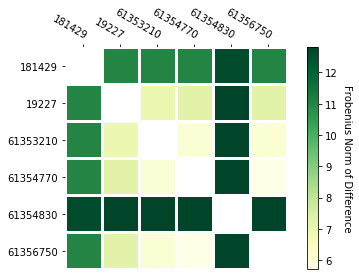

In [388]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

im, cbar = heatmap(np.log(ans), pat_id, pat_id, ax=ax,
                   cmap="YlGn", cbarlabel="Frobenius Norm of Difference")

fig.tight_layout()
#plt.title('Differences of Covariance Matrices')
plt.show()

In [389]:
# create vector answer matrix
ans = np.zeros((len(pat_id),len(pat_id)))

for j in range(len(pat_id)):
    for i in range(len(pat_id)):
        
        ans[i][j] = np.linalg.norm(np.subtract(np.mean(pat_dict[pat_id[i]],axis=1),np.mean(pat_dict[pat_id[j]],axis=1)), ord = 2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


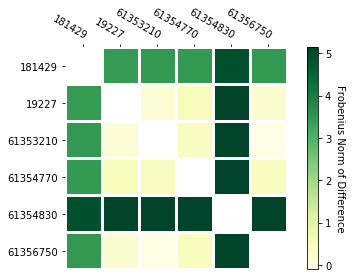

In [390]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

im, cbar = heatmap(np.log(ans), pat_id, pat_id, ax=ax,
                   cmap="YlGn", cbarlabel="Frobenius Norm of Difference")

fig.tight_layout()
plt.show()

In [391]:
from tqdm import tqdm
# create answer matrix from SVD
ans = np.zeros((len(pat_id),len(pat_id)))

for j in tqdm(range(len(pat_id))):
    for i in range(len(pat_id)):
        
        if ans[j][i] == 0:
            sing_val = 0

            U,S,V = np.linalg.svd(pat_dict[pat_id[i]])
            U2,S2,V2 = np.linalg.svd(pat_dict[pat_id[j]])

            u = U[0][sing_val].reshape(U[0][sing_val].shape[0], 1)
            v = V[0][sing_val].reshape(V[0][sing_val].shape[0], 1)
            u2 = U2[0][sing_val].reshape(U2[0][sing_val].shape[0], 1)
            v2 = V2[0][sing_val].reshape(V2[0][sing_val].shape[0], 1)
            #u = U[0][sing_val:]
            #v = V[0][sing_val:]
            #u2 = U2[0][sing_val:]
            #v2 = V2[0][sing_val:]

            matrix_1 = np.dot(u,S[0][1]).dot(v.T)
            matrix_2 = np.dot(u2,S2[0][1]).dot(v2.T)
        
            ans[i][j] = np.linalg.norm(np.subtract(matrix_1,matrix_2), ord = 2)
        else:
            ans[i][j] = ans[j][i]

100%|██████████| 6/6 [03:09<00:00, 26.55s/it]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


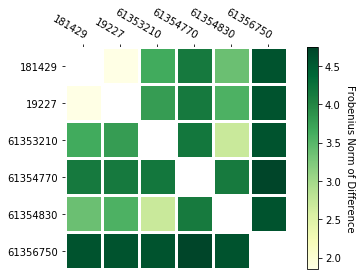

In [394]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

im, cbar = heatmap(np.log(ans), pat_id, pat_id, ax=ax,
                   cmap="YlGn", cbarlabel="Frobenius Norm of Difference")

fig.tight_layout()
plt.show()

In [318]:
# Check SVD of 51346750
U,S,V = np.linalg.svd(pat_dict[61356750])
S

array([[1.08765549e+02, 9.85864803e+01, 8.60233425e+01, ...,
        3.10371325e-15, 1.87290047e-15, 6.57429606e-16]])

In [319]:
# Check SVD of 51346750
U,S,V = np.linalg.svd(pat_dict[181429])
S

array([[4.92200876e+04, 2.78997868e+01, 1.29796818e+01, ...,
        8.92637811e-15, 5.54543151e-15, 3.06142477e-15]])

Remove the bad entries

In [410]:
pat_id_list = list(pat_id)
pat_id_list.remove(181429)
pat_id_list.remove(61354830)

In [411]:
pat_id_list

[19227, 61353210, 61354770, 61356750]

In [ ]:
Frobenius Norm Heatmap

In [417]:
# Create answer matrix
ans = np.zeros((len(pat_id_list),len(pat_id_list)))

for j in range(len(pat_id_list)):
    for i in range(len(pat_id_list)):
        ans[i][j] = np.linalg.norm(np.subtract(pat_dict[pat_id_list[i]],pat_dict[pat_id_list[j]])[0], ord = 'fro')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


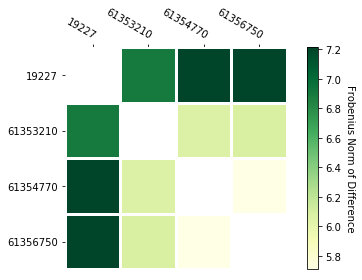

In [420]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

im, cbar = heatmap(np.log(ans), pat_id_list, pat_id_list, ax=ax,
                   cmap="YlGn", cbarlabel="Frobenius Norm of Difference")

fig.tight_layout()
#plt.title('Differences of Covariance Matrices')
plt.show()